## This is a prototype design of login time & duration, learning mode, and activity messuring in TEL platform - Backstage

### Properties for observing

**Login time & duration** indicate at which point-in-time and for what duration a learner starts a learning session in TEL platform Backstage. The login time is relating to the timezone setting of a learner relative to UTC time. The duration records how long is a learner active in TEL learning plattform. These two time properties observe the learning habit and workload habit of a perticular learner within the TEL plattform Backstage. 

**Learning mode** indicates the two learning modes used by learners within the TEL platform Backstage for discourse, quiz and reviewing course materials. The first mode is synchronized mode or online-mode. In this mode, learners actively participate a quiz running during a formal classroom session or a gruppe discussion live in online forums. The second mode is asynchronized mode or offline-mode, in this mode learners review the learning materials posted durching the past formal classroom session or the content of an past online discourse at online forum at a later time.

**Activity** indicates the number of triggered activations of UI elements within the backstage Web UI. 

The goal of measuring these properties is to identify a correlation between these measured properties and the **success factor** of a learner.

**Success factor** is unknown at the time of this writing, which should indicate the probability of a learner successfully passing a particular course

### Approaches for capturing data

**Login time** can be captured with timestamp of a learner's first http request for establishing a tcp connection.

**Duration** can be calculated with timesstamp of a user's connection timeout minus timeout duration of system setting and then minus login time in case of a connection timeout. A further possibility of calculation is to use timestamp of a user's logout time minus login time in case of a logout request actively trigged by learners.

**Learning mode** represents the mentally availability of a learner durching the classroom session and self-regulation/motivation of learning at spare time. A learner can either participate classroom quiz or not, a learner can either revisit materials or not. These behavious should be mapped with a integer value to represent the self-regulation/motivation of a learner.

The ***messurement of participating classroom quiz*** can be examed by the learners device ip address. In case the ip addresse of a device participating classroom quiz belongs to the same subnets of the ip addresse of teachers laptop, from which a quiz is started durching classroom session, the learner of this particular device participating classroom quiz must be physically located in classroom, which also implys the learner is physically available in formal classroom session. It is acceptable that a learner is physically available in the same building and participating quiz durching formal classroom session but sitting in a seperate room. This doesn't implys the physicall availabilty in the classroom but still it represents the mentally availability.

The ***messurement of revisit learning material*** can be examed by the access time of http request in Backstage. If the UTC access time is later than the finishing time of formal classroom session, than it is a revisit.

### Type of Analysis

how offen a user login, every day, every week, or every month. How is this behavior comparing with other user's profiles, or comparing with the desired behavior's pattern predefined by a lecturer.

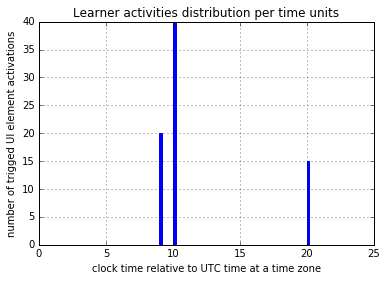

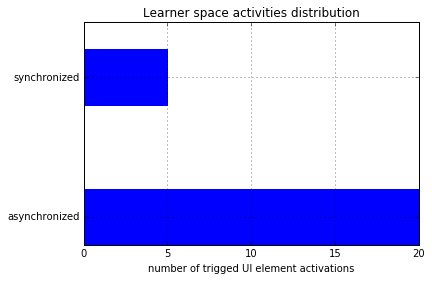

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def bar_ploting(normalized_scoring_distribution, xlabel_str, ylabel_str, title):
    """
    creates a bar plot
    """
    # scores as xvals
    xvals = normalized_scoring_distribution.keys()
    #print "xvals", xvals
    yvals = normalized_scoring_distribution.values()
    #fig = plt.figure()
    bar_width = 0.2
    plt.bar(xvals,yvals, bar_width, color="b", edgecolor="b")
    #(xvals, y1vals, 'r-')
    plt.xlabel(xlabel_str)
    plt.ylabel(ylabel_str)    
    plt.title(title)
    #plt.set_xticks(xvals)
    #plt.set_xticklabels(xvals)
    # show the grid line/ help line in plot
    plt.grid(True)
    #plt.legend(loc='upper right')
    #plt.axis([0, 210, 0, 0.04 ])
    #plt.figure(figsize=[9,6])
    plt.show()

def line_bar_ploting(distribution, xlabel_str, ylabel_str, title):
    """
    creates a bar plot of distribution
    """
    # scores as xvals
    yvals = distribution.keys()
    #print "xvals", xvals
    xvals = distribution.values()
    #fig = plt.figure()
    bar_width = 0.4
    # get the index of the y arrays
    y_pos = np.arange(len(yvals))
    # horizontal bar
    plt.barh(y_pos, xvals, bar_width, align="center", color="b", edgecolor="b")
    #(xvals, y1vals, 'r-')
    plt.xlabel(xlabel_str)
    # create labels
    plt.yticks(y_pos, yvals)
    plt.title(title)
    #plt.set_xticks(xvals)
    #plt.set_xticklabels(xvals)
    # show the grid line/ help line in plot
    plt.grid(True)
    #plt.legend(loc='upper right')
    #plt.axis([0, 210, 0, 0.04 ])
    #plt.figure(figsize=[9,6])
    plt.show()
    
## Main activity and time ##
xlabel_str = "clock time relative to UTC time at a time zone"
ylabel_str = "number of trigged UI element activations"
title = "Learner activities distribution per time units"
activity_time_distribution = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 
                7:0, 8:0, 9:20, 10:40, 11:0, 12:0,
                13:0, 14:0, 15:0, 16:0, 17:0, 18:0,
                19:0, 20:15, 21:0, 22:0, 23:0, 24:0}
bar_ploting(activity_time_distribution, xlabel_str, ylabel_str, title)

## Main space and time ##
xlabel_str = "number of trigged UI element activations"
activity_messurements = [10, 11]
title = "Learner space activities distribution"
activity_space_distribution = {'synchronized':5, 'asynchronized':20}
line_bar_ploting(activity_space_distribution, xlabel_str, ylabel_str, title);

Suthers and Rosen (2011) capture the challenge when stating "since interaction is distributed across space, time, and media, and the data comes in a variety of formats, there is no single transcript to inspect and share, and the available data representations may not make interaction and its consequences apparent" (p. 65) [Sie2013] (p. 1393)

"One approach to consider in the privacy and ethics of analytics is to treat data as a transactinal entity (such as money). It is conceivable that in the future, students will be encouraged to provide their data to the university in exchange for personalized support services. For some students, the sharing of personal data with an institution in exchange for better support and personalized learning will be seen as a fair value exchange." proposed by George Siemens in [Sie2013] (p. 1394)